In [1]:
import numpy as np
import pandas as pd

In [2]:
# from pymongo import MongoClient

# db = MongoClient('mongodb://localhost/SmartHome', 27017).SmartHome

In [3]:
# table = db.video_kitchen.find({})

In [4]:
PATH ='C:/Users/ralkh/Desktop/smarthome-master/'

df = pd.read_csv('C:/Users/ralkh/Desktop/smarthome-master/data/train/00001/video_kitchen.csv')
df.head()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z
0,22.327,221.753830,177.598480,269.0,233.0,182.0,106.0,346.453125,-323.140625,1599.875000,622.981689,-645.843445,1629.875000,121.110672,77.070404,1569.875000
1,22.358,222.427856,175.268661,275.0,233.0,184.0,104.0,356.359253,-315.492096,1627.852783,668.556763,-656.929749,1657.852783,134.475281,89.650192,1597.852783
2,22.389,223.092026,170.902344,275.0,233.0,188.0,102.0,367.825134,-296.759583,1662.541382,682.545593,-670.675232,1692.541382,160.293762,103.045998,1632.541382
3,22.420,226.071838,170.461243,279.0,233.0,192.0,98.0,395.546173,-302.091644,1707.207642,724.925171,-688.374329,1737.207642,188.205124,129.390976,1677.207642
4,22.452,226.991333,170.084122,281.0,233.0,194.0,96.0,403.839905,-301.919189,1719.080322,742.146484,-693.078979,1749.080322,201.383408,142.152985,1689.080322


In [5]:
df.describe()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z
count,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000
mean,709.938978,145.981587,97.135060,171.441013,159.506470,121.868870,46.440144,-97.277319,312.987955,3216.975182,178.872620,-389.820184,3246.975182,-353.918810,865.541879,3186.975182
std,248.255252,47.452962,30.620390,43.987655,32.619274,53.053476,26.338815,397.847593,314.584778,535.881864,406.825212,229.328384,535.881864,415.562424,343.016158,535.881864
min,22.327000,31.733673,66.370583,65.000000,133.000000,6.000000,10.000000,-1003.134216,-518.584045,871.402771,-760.325928,-944.031616,901.402771,-1347.262085,-389.467590,841.402771
25%,529.962000,155.724823,76.508835,173.000000,137.000000,130.000000,32.000000,-53.264706,207.921982,3056.053955,167.699432,-471.979187,3086.053955,-350.134888,812.309326,3026.053955
50%,627.638000,162.022858,84.919388,181.000000,143.000000,142.000000,36.000000,24.422209,435.162292,3402.129883,250.038879,-283.786438,3432.129883,-228.646118,1003.389099,3372.129883
75%,1004.420000,171.268341,100.953674,195.000000,165.000000,150.000000,46.000000,137.550720,525.083984,3629.643799,420.100739,-219.578629,3659.643799,-113.453751,1082.988281,3599.643799
max,1810.122000,304.187134,228.242371,309.000000,233.000000,300.000000,226.000000,1395.421021,689.390991,3735.576660,1463.037598,-166.827438,3765.576660,1340.170532,1216.302246,3705.576660


In [6]:
df.isnull().sum()

t              0
centre_2d_x    0
centre_2d_y    0
bb_2d_br_x     0
bb_2d_br_y     0
bb_2d_tl_x     0
bb_2d_tl_y     0
centre_3d_x    0
centre_3d_y    0
centre_3d_z    0
bb_3d_brb_x    0
bb_3d_brb_y    0
bb_3d_brb_z    0
bb_3d_flt_x    0
bb_3d_flt_y    0
bb_3d_flt_z    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [8]:
%matplotlib inline
rcParams['figure.figsize'] = 30,5
sb.set_style('whitegrid')

In [9]:
from ipywidgets import widgets
from bokeh.models.annotations import Label
from bokeh.plotting import figure, output_file, curdoc,show,output_notebook

In [10]:
centre_3d_x = df.centre_3d_x
centre_3d_y = df.centre_3d_y
centre_3d_z = df.centre_3d_z

bb_3d_brb_x  = df.bb_3d_brb_x
bb_3d_brb_y  = df.bb_3d_brb_y
bb_3d_brb_z  = df.bb_3d_brb_z

bb_3d_flt_x  = df.bb_3d_flt_x
bb_3d_flt_y  = df.bb_3d_flt_y
bb_3d_flt_z  = df.bb_3d_flt_z

In [11]:
from ipywidgets import widgets
from bokeh.models.annotations import Label
from bokeh.plotting import figure, output_file, curdoc,show,output_notebook

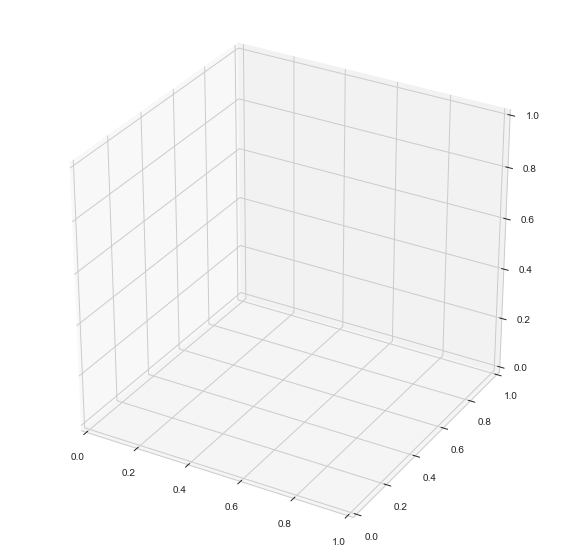

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

from itertools import product, combinations

# Rectangle()
rcParams['figure.figsize'] = 10,10
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

In [13]:
def Moves(x):
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs=centre_3d_x[x], ys=centre_3d_y[x], zs=centre_3d_z[x], c='r', marker='o')
    ax.scatter(xs=bb_3d_brb_x[x], ys=bb_3d_brb_y[x], zs=bb_3d_brb_z[x], c='b', marker='o')
    ax.scatter(xs=bb_3d_flt_x[x], ys=bb_3d_flt_y[x], zs=bb_3d_flt_z[x], c='b', marker='o')
   
    plt.show()

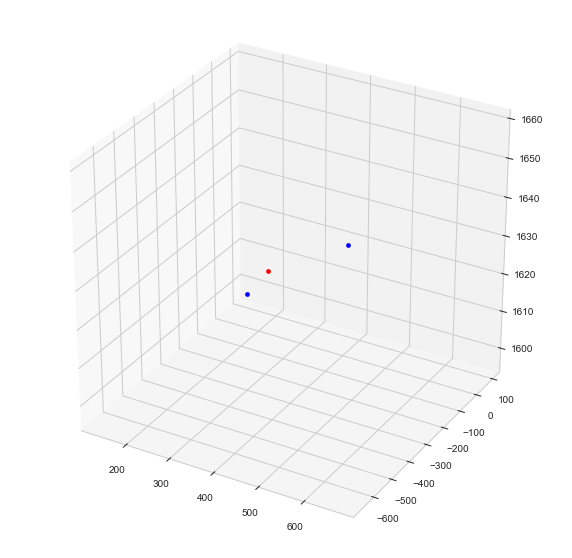

In [14]:
widgets.interact(Moves, x=widgets.IntSlider(min=1,max=centre_3d_y.count()-1,step=1,value=1));

In [15]:
from PIL import Image
import matplotlib.patches as patches
from matplotlib import animation, rc
from IPython.display import HTML

In [16]:
centre_2d_x = df.centre_2d_x
centre_2d_y = df.centre_2d_y

bb_2d_tl_x = df.bb_2d_tl_x
bb_2d_tl_y = df.bb_2d_tl_y
 
bb_2d_br_x = df.bb_2d_br_x 
bb_2d_br_y = df.bb_2d_br_x 

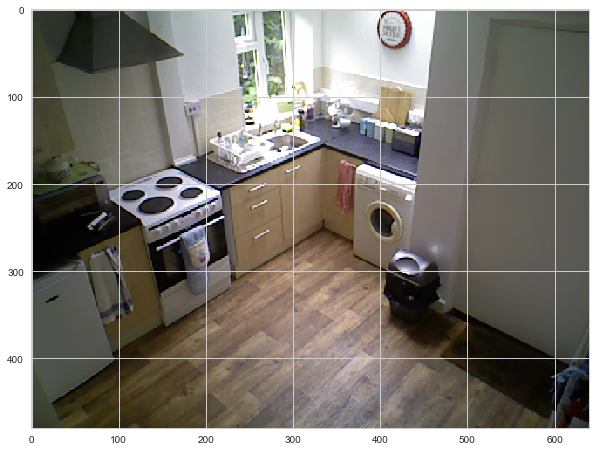

In [17]:
# First set up the figure, the axis, and the plot element we want to animate
im = np.array(Image.open('kitchen.png'), dtype=np.uint8)


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

patch = patches.Rectangle((0, 0), 0, 0, fc='y')

In [18]:
# # initialization function: plot the background of each frame

def init():
    ax.add_patch(patch)
    return patch,

In [19]:
def animate(i):
    height =  bb_2d_br_y[i] - bb_2d_tl_y[i]

    weidth =  bb_2d_br_x[i] - bb_2d_tl_x[i]

    patch.set_width(weidth)
    patch.set_height(height)
    
    patch.set_xy([centre_2d_x[i] , centre_2d_x[i]])
    
    return patch,

In [20]:
anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=500,
                               interval=50,
                               blit=True)
plt.show()
HTML(anim.to_html5_video())